In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [36]:
te=pd.read_csv('/Test.csv')
te

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333
...,...,...,...,...,...,...,...,...
1498,3939,ps2,2004,sports,Electronic Arts,T,1.809524,0.192308
1499,961,ds,2007,platform,Take-Two Interactive,E,8.800000,0.625000
1500,3417,xone,2016,action,Insomniac Games,E,5.500000,0.333333
1501,2489,ps,2002,racing,Electronic Arts,E,8.625000,0.690000


In [37]:
tr=pd.read_csv('/Train.csv')
tr

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671
...,...,...,...,...,...,...,...,...,...
3501,1323,ds,2007,role-playing,Square Enix,E10+,1.702128,0.065421,3.584264
3502,2862,3ds,2018,action,Nintendo,E10+,3.625000,0.090000,2.701472
3503,1980,ps3,2012,action,Warner Bros. Interactive Entertainment,E10+,2.814815,0.172917,1.631668
3504,3065,3ds,2016,simulation,Marvelous Entertainment,E10+,2.571429,0.464286,2.899156


## check the null values

In [38]:
tr.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [39]:
tr.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2182
SalesInMillions    3506
dtype: int64

## Data visualization

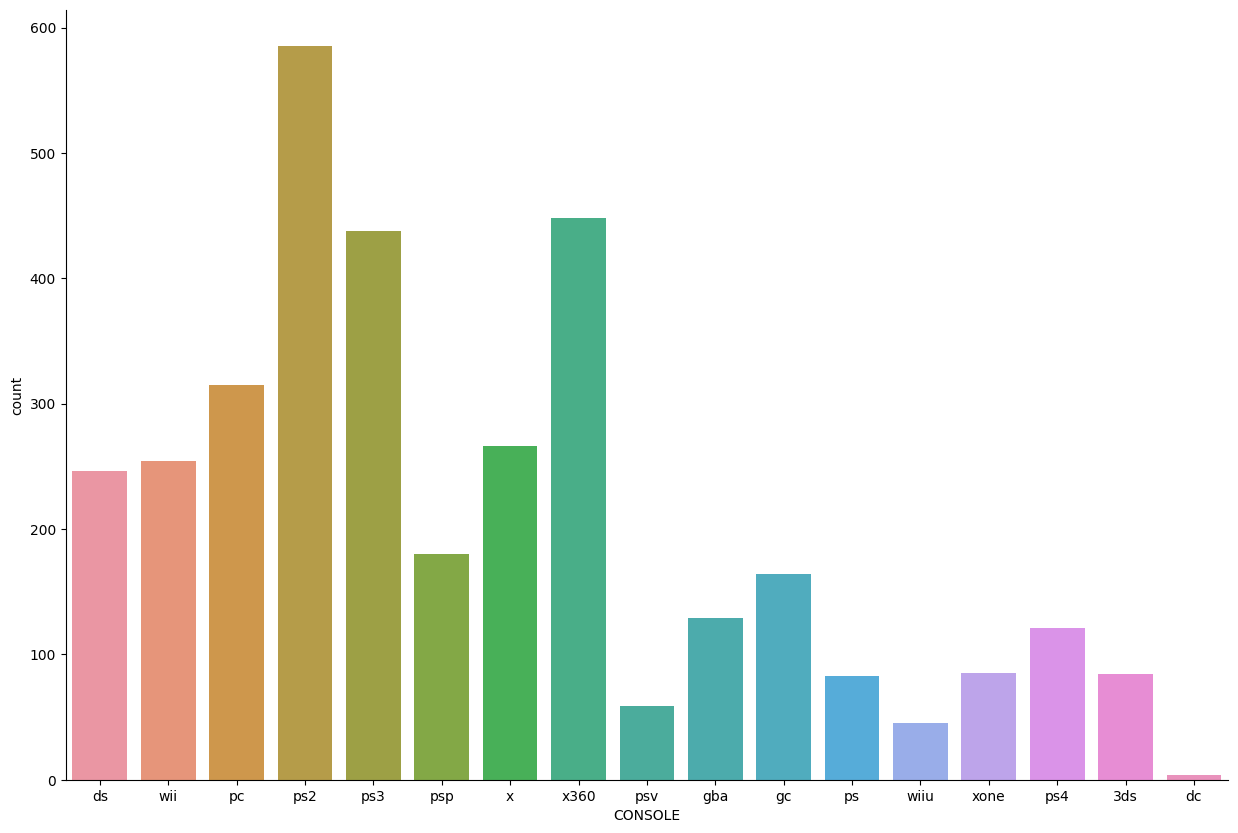

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data=tr,x='CONSOLE')
plt.gca().spines[['top','right']].set_visible(False)

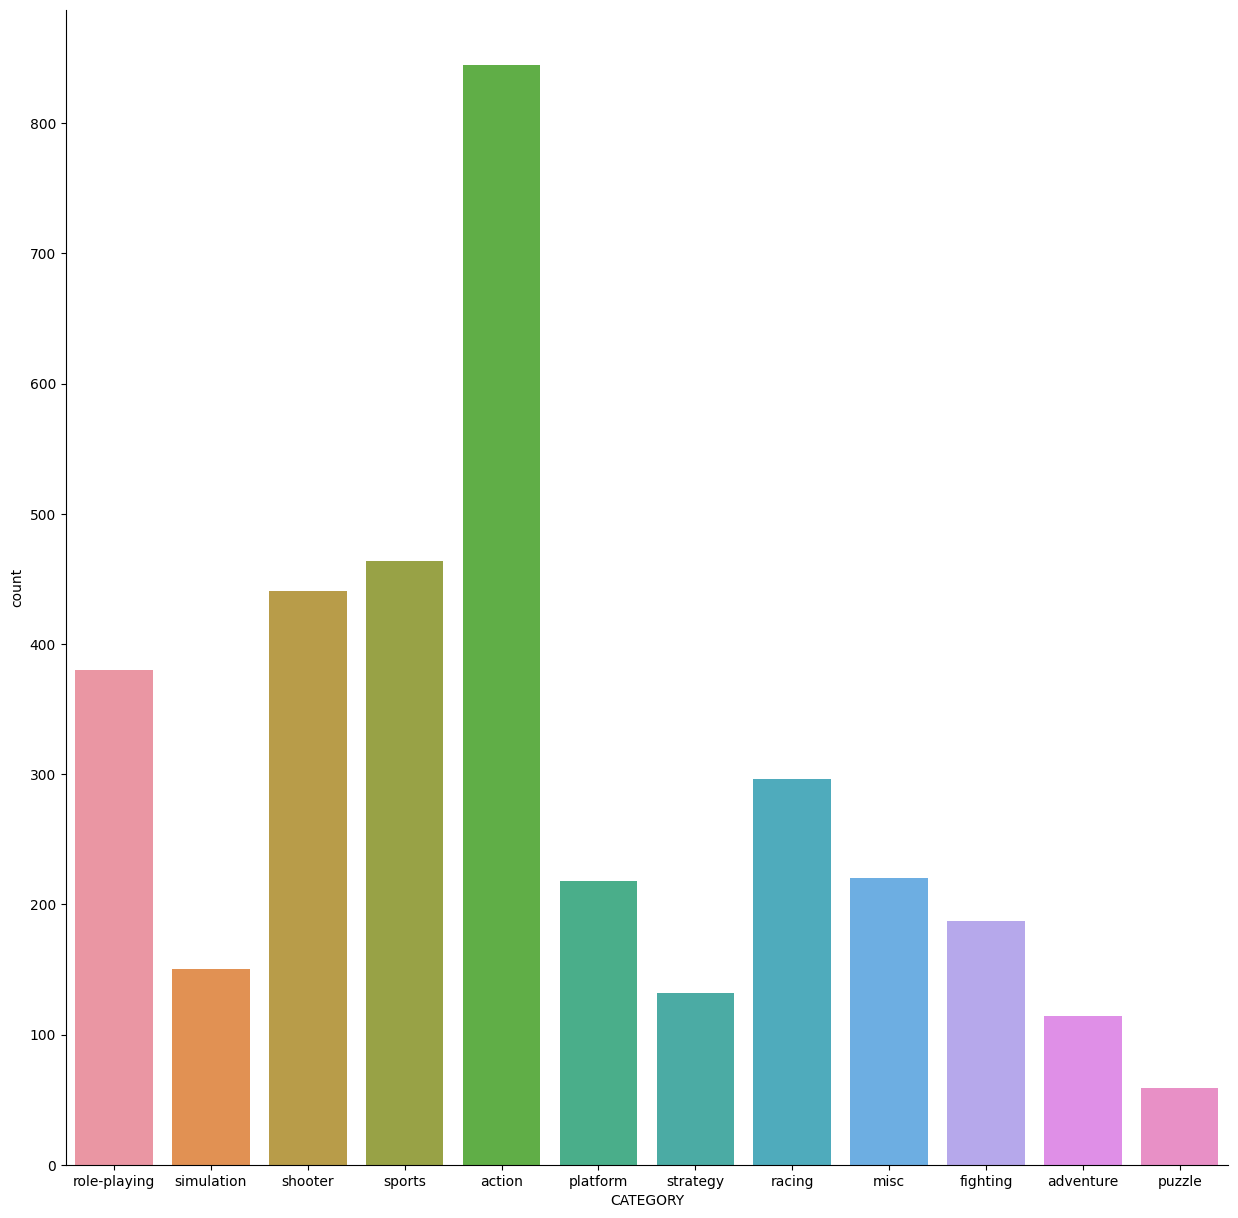

In [41]:
plt.figure(figsize=(15,15))
import seaborn as sns
sns.countplot(data=tr,x='CATEGORY')
plt.gca().spines[['top','right']].set_visible(False)

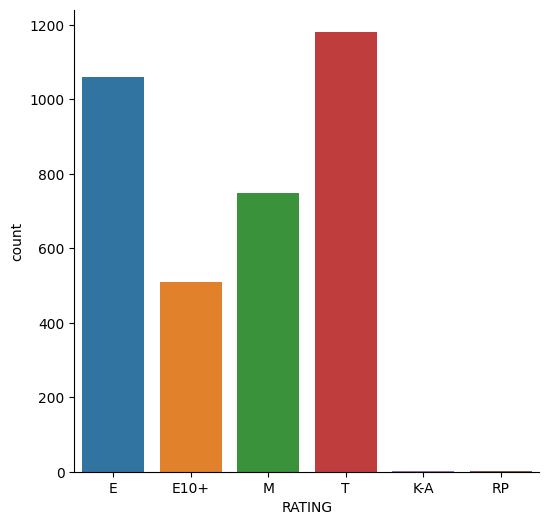

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(data=tr,x='RATING')
plt.gca().spines[['top','right']].set_visible(False)

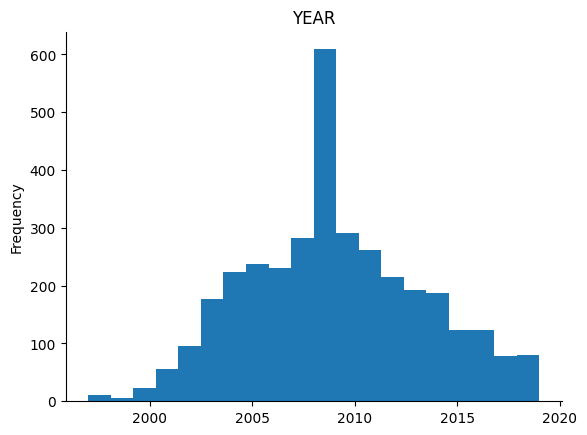

In [43]:
tr['YEAR'].plot(kind='hist', bins=20, title='YEAR')
plt.gca().spines[['top', 'right',]].set_visible(False)

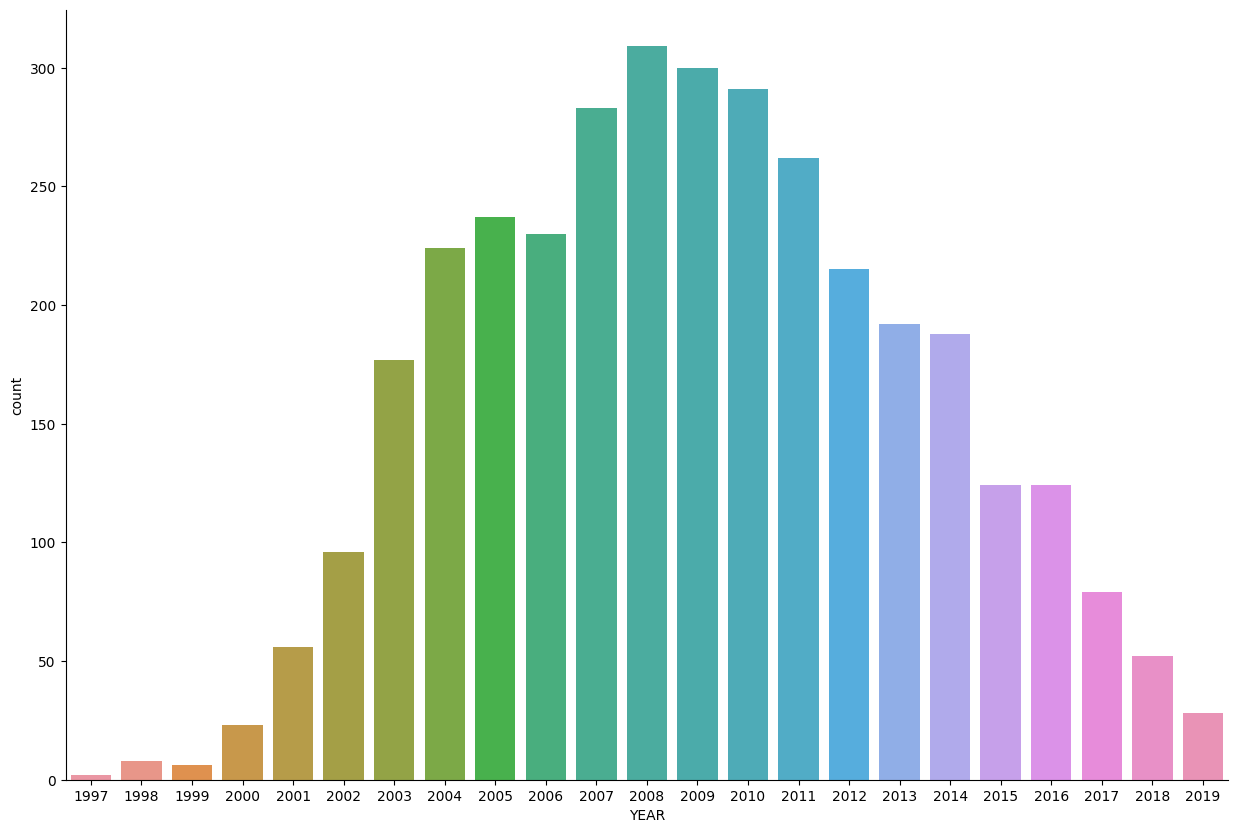

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(data=tr,x='YEAR')
plt.gca().spines[['top','right']].set_visible(False)

##  "Feature extraction" or "Feature selection,"

In [45]:
X=tr.drop(['SalesInMillions'],axis=1)
y=tr['SalesInMillions']
y

0       1.779257
1       0.215050
2       0.534402
3       1.383964
4       0.082671
          ...   
3501    3.584264
3502    2.701472
3503    1.631668
3504    2.899156
3505    1.221262
Name: SalesInMillions, Length: 3506, dtype: float64

In [46]:
features=X.columns
target=['SalesInMillions']
features

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS'],
      dtype='object')

## Split the data into train and test

In [47]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=42)
y_tr

721     2.120724
761     0.492427
631     1.596332
1565    2.601266
2750    0.924304
          ...   
1095    2.053919
1130    5.370461
1294    0.303964
860     3.146398
3174    4.114769
Name: SalesInMillions, Length: 2804, dtype: float64

## Model training" or "Model fitting

In [48]:
import catboost as cat
cat_feat = ['CONSOLE','CATEGORY', 'PUBLISHER', 'RATING']
target = 'SalesInMillions'
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(tr[features],tr[target])

## Model's predictions

In [49]:
y_pred=model.predict(X_te)
y_pred

array([ 2.93740877,  1.66949636,  7.98010467,  2.09074031,  1.67006191,
        2.65836458,  3.89739585,  3.86944768,  1.66971361,  2.11624213,
        1.79311611,  1.80690679,  1.54264991,  3.9695451 ,  2.06085708,
        1.70712027,  1.82105306,  1.80306002,  1.46749956,  1.80522313,
        2.02589297,  1.7074954 ,  1.80422917,  1.77781465,  2.04545558,
        1.55147299,  3.48271285,  1.54647724,  1.70799607,  1.55691245,
        2.09978522,  4.02809953,  1.91853906,  1.68290079,  2.24671114,
        1.82070131,  1.69143189,  1.39418396,  1.69128474,  2.44114584,
        1.72178858,  2.63876598,  1.57810106,  2.09219784,  1.31033498,
        1.28826077,  1.73991226,  1.59733001,  1.60015921,  1.99156216,
        2.02801985,  1.86491621,  2.21385126,  1.97574327,  1.50506776,
        5.73184869,  1.70675865,  1.28537828,  1.99191672,  5.63791989,
        1.57527357,  2.82522346,  1.77495586,  1.99698273,  1.99019306,
        1.92573619,  2.74531519,  1.23765417,  1.57414238,  1.61

## Evaluation of performance of Models.

In [50]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_te,y_pred)
error

1.4524716080503557

## Prediction of Test data

In [51]:
test=model.predict(te)
test

array([1.92878217, 1.98599372, 3.58435803, ..., 1.76953997, 2.00641846,
       2.31450416])

In [52]:
te['SALES']=test
te

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SALES
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353,1.928782
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795,1.985994
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044,3.584358
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000,1.959020
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333,1.856838
...,...,...,...,...,...,...,...,...,...
1498,3939,ps2,2004,sports,Electronic Arts,T,1.809524,0.192308,2.371044
1499,961,ds,2007,platform,Take-Two Interactive,E,8.800000,0.625000,1.458715
1500,3417,xone,2016,action,Insomniac Games,E,5.500000,0.333333,1.769540
1501,2489,ps,2002,racing,Electronic Arts,E,8.625000,0.690000,2.006418
